# ELGMask
This notebook will update the bright star mask for DESI ELGs.

## Density Fluctuations Before (Old Masking Radius)
First, let's checkout the trends when `maskbits=1, 2, 3` are applied. 

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import modules as ms
from astropy import units as u
from time import time

In [2]:
field = 'south'

loader =  ms.DataLoader(maskbits=[1, 12, 13])
cat = loader.read_cat(field)         # read target catalog
ran = loader.read_randoms(field)     # read random catalog
gaia = loader.read_gaia(field)       # read gaia star catalog

#ms.plot_cat_on_gaia(cat, gaia, field) #
#ms.plot_cat_on_gaia(ran, gaia, field) #
#ms.plot_gaia_specs(gaia)
#ms.check_maskbits(cat)
#ms.check_maskbits(ran)

data_dir            : /fs/ess/PHS0336/data/elgmask
gaia_path           : /fs/ess/PHS0336/data/elgmask/gaia_lrg_mask_v1.fits
gaia_suppl_path     : /fs/ess/PHS0336/data/elgmask/gaia_reference_suppl_dr9.fits
gaia_columns        : ['RA', 'DEC', 'mask_mag']
target_class        : ELG
maskbits            : [1, 12, 13]
min_nobs            : 1

# of targets: 35360631
# of targets (after maskbits=[1, 12, 13]): 35360631
# of targets (after LMC cut): 34836102
# of targets (after min_nobs >= 1): 34836102
# of targets: 155396056
# of targets (after maskbits=[1, 12, 13]): 153649077
# of targets (after LMC cut): 151878758
# of targets (after min_nobs >= 1): 143383338
# of gaia objects: 41065340
# of gaia objects (south): 31909567


GAIA_G <= 4.0 813 stars
1854022 nearby objects around 756 stars
7364245 nearby randoms around 756 stars
done in 179.06223964691162


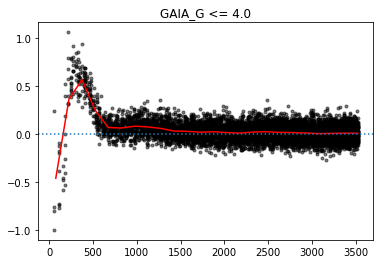

4.0 < GAIA_G <= 5.0 1203 stars
833775 nearby objects around 1054 stars
3387663 nearby randoms around 1053 stars
done in 34.337687969207764


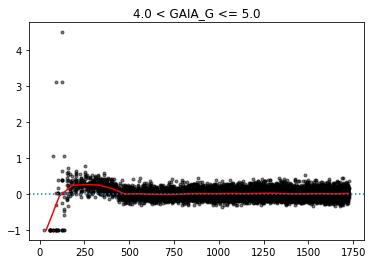

5.0 < GAIA_G <= 6.0 2244 stars
1256254 nearby objects around 1922 stars
5065545 nearby randoms around 1922 stars
done in 40.13365602493286


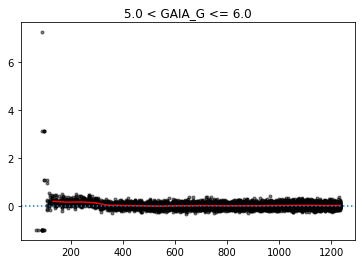

6.0 < GAIA_G <= 7.0 6183 stars
1865144 nearby objects around 5208 stars
7679289 nearby randoms around 5209 stars
done in 39.531622648239136


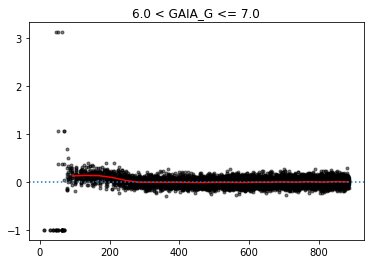

7.0 < GAIA_G <= 7.5 6013 stars
983813 nearby objects around 4983 stars
4054735 nearby randoms around 4987 stars
done in 29.35084867477417


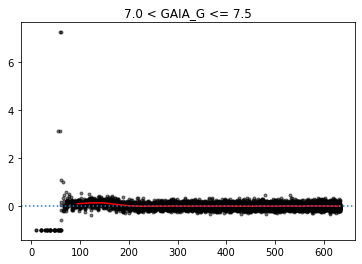

7.5 < GAIA_G <= 8.0 9237 stars
1101799 nearby objects around 7562 stars
4544438 nearby randoms around 7564 stars
done in 37.0707745552063


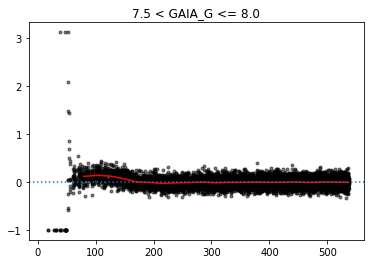

8.0 < GAIA_G <= 8.5 14191 stars
1266423 nearby objects around 11411 stars
5194264 nearby randoms around 11418 stars
done in 39.34223937988281


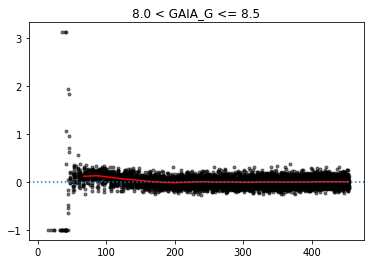

8.5 < GAIA_G <= 9.0 21936 stars
1417458 nearby objects around 17715 stars
5814828 nearby randoms around 17723 stars
done in 37.189287424087524


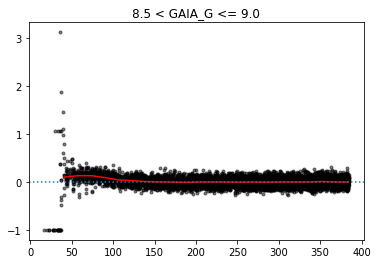

9.0 < GAIA_G <= 9.5 33488 stars
1550909 nearby objects around 26748 stars
6357989 nearby randoms around 26757 stars
done in 36.995424032211304


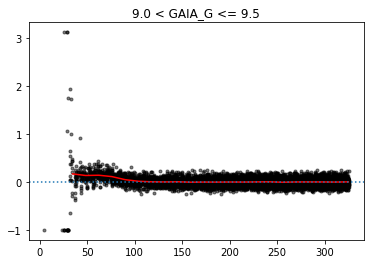

9.5 < GAIA_G <= 10.0 49453 stars
1666033 nearby objects around 39004 stars
6818547 nearby randoms around 39027 stars
done in 37.46270155906677


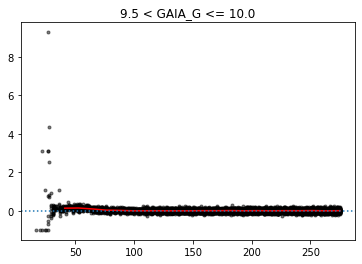

10.0 < GAIA_G <= 10.5 72971 stars
1764707 nearby objects around 57078 stars
7251081 nearby randoms around 57122 stars
done in 41.7978937625885


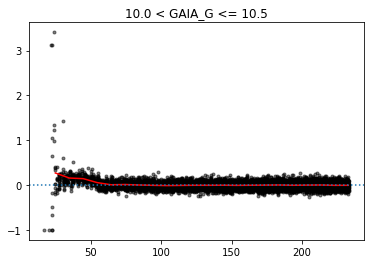

10.5 < GAIA_G <= 11.0 108263 stars
1866468 nearby objects around 84224 stars
7652865 nearby randoms around 84293 stars
done in 41.987990856170654


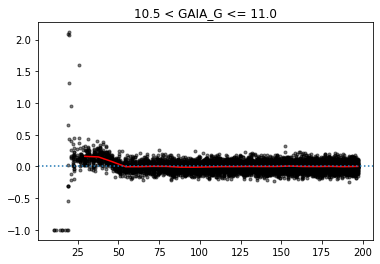

11.0 < GAIA_G <= 11.5 160166 stars
1975256 nearby objects around 124370 stars
8100735 nearby randoms around 124495 stars
done in 43.00557494163513


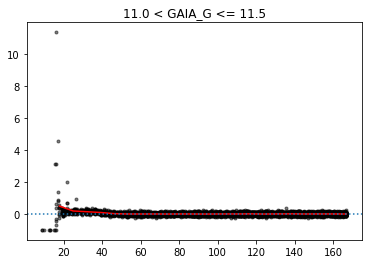

11.5 < GAIA_G <= 12.0 233635 stars
2046182 nearby objects around 180299 stars
8401914 nearby randoms around 180471 stars
done in 42.648815393447876


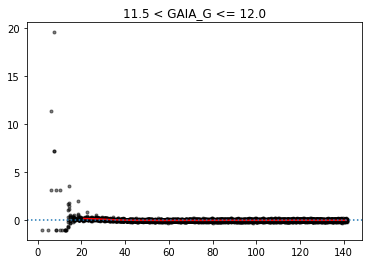

12.0 < GAIA_G <= 12.5 336505 stars
2103765 nearby objects around 258557 stars
8625762 nearby randoms around 258983 stars
done in 43.80808401107788


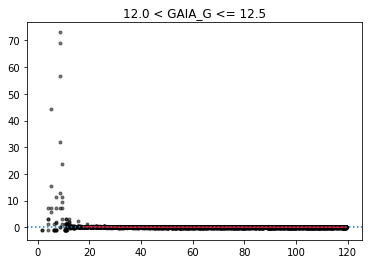

12.5 < GAIA_G <= 13.0 479640 stars
2132483 nearby objects around 364839 stars
8753095 nearby randoms around 366822 stars
done in 44.70162773132324


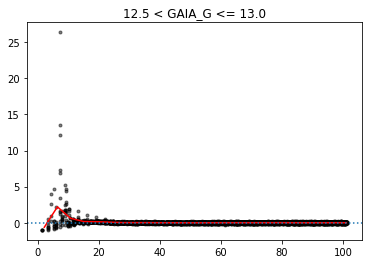

13.0 < GAIA_G <= 13.5 669008 stars
2136965 nearby objects around 498191 stars
8789840 nearby randoms around 507879 stars
done in 44.18099522590637


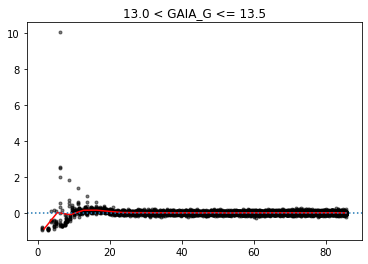

13.5 < GAIA_G <= 14.0 926805 stars
2105310 nearby objects around 660421 stars
8659750 nearby randoms around 698404 stars
done in 46.729175329208374


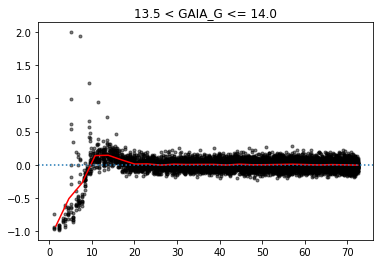

14.0 < GAIA_G <= 14.5 1263191 stars
2031553 nearby objects around 829628 stars
8385589 nearby randoms around 942960 stars
done in 49.03084754943848


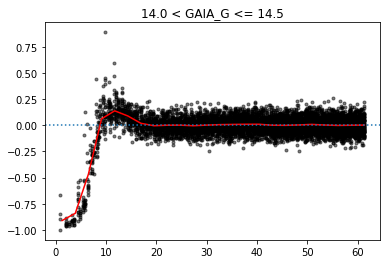

14.5 < GAIA_G <= 15.0 1696214 stars
1928537 nearby objects around 981081 stars
7987926 nearby randoms around 1249756 stars
done in 49.96438717842102


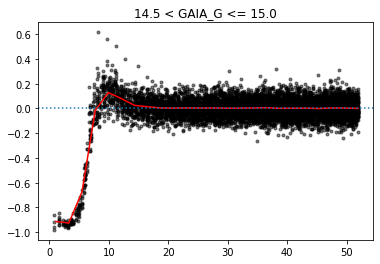

15.0 < GAIA_G <= 15.5 2236900 stars
1803645 nearby objects around 1092361 stars
7498309 nearby randoms around 1619106 stars
done in 53.0627863407135


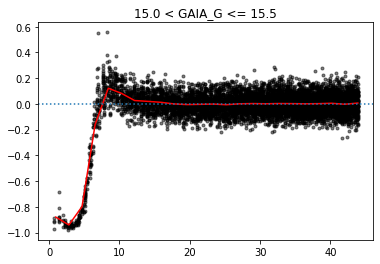

15.5 < GAIA_G <= 16.0 2917594 stars
1664325 nearby objects around 1154915 stars
6938814 nearby randoms around 2032018 stars
done in 53.92783761024475


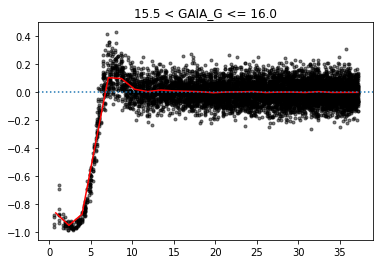

16.0 < GAIA_G <= 16.5 3744435 stars
1537415 nearby objects around 1176901 stars
6334902 nearby randoms around 2439464 stars
done in 55.397340536117554


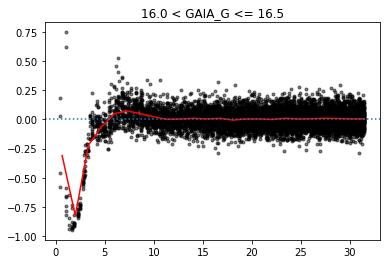

16.5 < GAIA_G <= 17.0 4748886 stars
1383368 nearby objects around 1144963 stars
5731541 nearby randoms around 2780366 stars
done in 60.28804278373718


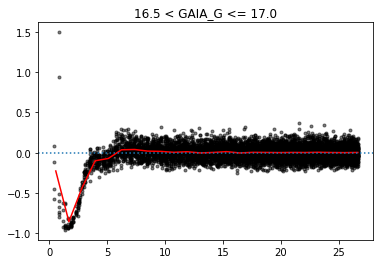

17.0 < GAIA_G <= 17.5 5888064 stars
1220110 nearby objects around 1067280 stars
5060841 nearby randoms around 2957375 stars
done in 61.243454456329346


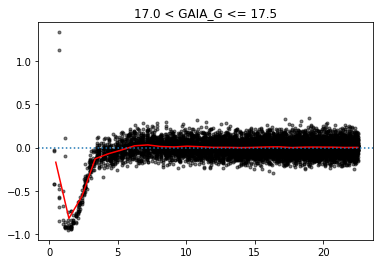

17.5 < GAIA_G <= 18.0 6282529 stars
908605 nearby objects around 825328 stars
3776684 nearby randoms around 2541602 stars
done in 60.439937114715576


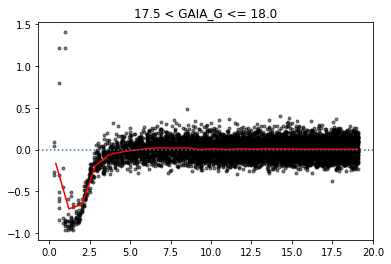

In [41]:
# project data and randoms to Sky objects
sky2 = ms.cat2sky(cat)
sky3 = ms.cat2sky(ran)

# mag_edges = np.percentile(gaia['mask_mag'], np.arange(0., 100, 10.0))
gaia_mag_list = np.array([-np.inf, 4., 5., 6., 7.] + np.arange(7.5, 18.5, 0.5).tolist())
print(gaia_mag_list)
nbins = 101

for i in range(0, len(gaia_mag_list)-1):
    
    t0 = time()
    
    gaia_min, gaia_max = gaia_mag_list[i:i+2]
    gaia1 = ms.select_gaia(gaia, gaia_min, gaia_max)
    if gaia_min==-np.inf:
        title = 'GAIA_G <= {:.1f}'.format(gaia_max, len(gaia1))
    else:
        title = '{:.1f} < GAIA_G <= {:.1f}'.format(gaia_min, gaia_max, len(gaia1))
    print(title, '{} stars'.format(len(gaia1)))       
    
    search_radius = np.minimum(gaia1['radius'].max() * 4.1, 3600)
    sky1 = ms.cat2sky(gaia1)
    
    # objects
    idx1, idx2, d2d, _ = sky2.search_around_sky(sky1, seplimit=search_radius*ms.arcsec)
    # randoms
    idx1_ran, idx2_ran, d2d_ran, _ = sky3.search_around_sky(sky1, seplimit=search_radius*ms.arcsec)

    d2d = np.array(d2d.to(u.arcsec))  # convert distances to numpy array in arcsec
    d_ra, d_dec = ms.get_residuals(gaia1[idx1], cat[idx2])
    d2d_ran = np.array(d2d_ran.to(u.arcsec))  # convert distances to numpy array in arcsec
    d_ra_ran, d_dec_ran = ms.get_residuals(gaia1[idx1_ran], ran[idx2_ran])
    print('{} nearby objects around {} stars'.format(len(np.unique(idx2)), len(np.unique(idx1))))
    print('{} nearby randoms around {} stars'.format(len(np.unique(idx2_ran)), len(np.unique(idx1_ran))))
    
    bins, density, __ = ms.get_density(d_ra, d_dec, d2d, search_radius, nbins=nbins)
    bins_ran, density_ran, counts_ran = ms.get_density(d_ra_ran, d_dec_ran, d2d_ran, search_radius, nbins=nbins)
    
    sf = len(cat)/len(ran)
    reldens = ms.get_relative_density(bins, density, density_ran*sf, nbins)

    np.savez(f'dens_elg_gaia_gmag_{i}.npz', **{'bins':bins, 'density':density, 
                                     'density_ran':density_ran, 
                                     'counts_ran':counts_ran,
                                     'sf':sf,
                                     'reldens':reldens})  
    print(f'done in {time()-t0}')
    
    plt.figure()
    plt.title(title)
    plt.plot(*reldens[0], color='r')
    plt.plot(reldens[1][0].flatten(), reldens[1][1].flatten()-1.0, 
         marker='.', ls='none', alpha=0.5, color='k', zorder=-10)
    plt.axhline(0.0, ls=':')
    #plt.xlim(-10., 3700.)
    #plt.ylim(-1.1, 3.2)
    plt.show()

### Radius-Magnitude Relationship
Now we obtain the radius-mag relationship from visual inspection of the trends above.

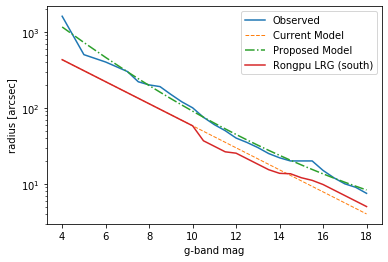

In [15]:
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

def fun(x, *p):
    return p[0]+p[1]*x+p[2]*x*x

# Old DR9 radius-mag relation
mag2r = lambda mag: 1630. * 1.396**(-mag)

# from trends above
radii_ = [1600., 500., 400., 300., 220., 200., 190., 150., 120., 100., 
         75., 60., 50., 40., 35., 30., 25., 22., 20., 20., 20., 15., 12., 10.,
         9., 7.5]
print(len(gaia_mag_list), len(radii))

x = gaia_mag_list[1:]
y = np.log10(radii)
res = curve_fit(fun, x, y, [1., 1., 1.])

# Rongpu's South
mags = np.array([4.0, 9.0, 10.0, 10.5, 11.5, 12.0, 12.5, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 17.0, 18.0])
radii = np.array([429.18637985, 80.95037032, 57.98737129, 36.80882682,
        26.36735446, 25.29190318, 21.40616169, 15.33392671,
        13.74150366, 13.56870306, 12.03092488, 11.10823009,
         9.79334208, 7.01528803, 5.02527796])
log_radii = np.log10(radii)
f_radius_log_south = interp1d(mags, log_radii, bounds_error=False, fill_value='extrapolate')
f_radius_south = lambda mags: 10**f_radius_log_south(mags)


plt.plot(x, radii_, label='Observed')
plt.plot(x, mag2r(x), label='Current Model', ls='--', lw=1)
plt.plot(x, 10**(fun(x, *res[0])), label='Proposed Model', ls='-.')
plt.plot(x, f_radius_south(x), label='Rongpu LRG (south)')

plt.xlabel('g-band mag')
plt.ylabel('radius [arcsec]')
plt.legend()
plt.yscale('log')
plt.savefig('rad_mag_gaia.png', dpi=300, bbox_inches='tight')

### Flag Galaxies
In this step we use the new star radius to tag galaxies.

In [3]:
from sklearn.neighbors import KDTree

def radec2pos(ra, dec):
    """ converting ra dec to position on a unit sphere.
        ra, dec are in degrees.
    """
    pos = np.empty(len(ra), dtype=('f8', 3))
    ra = ra * (np.pi / 180)
    dec = dec * (np.pi / 180)
    pos[:, 2] = np.sin(dec)
    pos[:, 0] = np.cos(dec) * np.sin(ra)
    pos[:, 1] = np.cos(dec) * np.cos(ra)
    return pos

def veto(coord, center, R):
    """
        Returns a veto mask for coord. any coordinate within R of center
        is vet.
        Parameters
        ----------
        coord : (RA, DEC)
        center : (RA, DEC)
        R     : degrees
        Returns
        -------
        Vetomask : True for veto, False for keep.
    """
    pos_stars = radec2pos(center[0], center[1])
    R = 2 * np.sin(np.radians(R) * 0.5)
    pos_obj = radec2pos(coord[0], coord[1])
    tree = KDTree(pos_obj)
    vetoflag = np.zeros(len(pos_obj), dtype='?')
    arg = tree.query_radius(pos_stars, r=R)
    arg = np.concatenate(arg)
    vetoflag[arg] = True
    return vetoflag


# data masking
radius_deg = gaia['radius'].data / 3600 # deg
center = (gaia['RA'].data, gaia['DEC'].data)
coord = (cat['RA'].data, cat['DEC'].data)
is_bad = veto(coord, center, radius_deg)
np.save('is_bad_south.npy', is_bad)

# random masking
coordr = (ran['RA'].data, ran['DEC'].data)
is_badr = veto(coordr, center, radius_deg)
np.save('is_badr_south.npy', is_badr)

In [4]:
2

2

## Density Fluctuations After Masking

In [ ]:
is_badr = np.load('is_badr_south.npy')
is_bad = np.load('is_bad_south.npy')

cat = cat[~is_bad]
ran = ran[~is_badr]

sky2 = ms.cat2sky(cat)
sky3 = ms.cat2sky(ran)

gaia_mag_list = np.array([-np.inf, 4., 5., 6., 7.] + np.arange(7.5, 18.5, 0.5).tolist())
print(gaia_mag_list)

nbins = 101
for i in range(0, len(gaia_mag_list)-1):
    
    t0 = time()
    
    gaia_min, gaia_max = gaia_mag_list[i:i+2]
    gaia1 = ms.select_gaia(gaia, gaia_min, gaia_max)
    if gaia_min==-np.inf:
        title = 'GAIA_G <= {:.1f}'.format(gaia_max, len(gaia1))
    else:
        title = '{:.1f} < GAIA_G <= {:.1f}'.format(gaia_min, gaia_max, len(gaia1))
    print(title, '{} stars'.format(len(gaia1)))       
    
    search_radius = np.minimum(gaia1['radius'].max() * 4.1, 3600)
    sky1 = ms.cat2sky(gaia1)
    
    # objects
    idx1, idx2, d2d, _ = sky2.search_around_sky(sky1, seplimit=search_radius*ms.arcsec)
    # randoms
    idx1_ran, idx2_ran, d2d_ran, _ = sky3.search_around_sky(sky1, seplimit=search_radius*ms.arcsec)

    d2d = np.array(d2d.to(u.arcsec))  # convert distances to numpy array in arcsec
    d_ra, d_dec = ms.get_residuals(gaia1[idx1], cat[idx2])
    d2d_ran = np.array(d2d_ran.to(u.arcsec))  # convert distances to numpy array in arcsec
    d_ra_ran, d_dec_ran = ms.get_residuals(gaia1[idx1_ran], ran[idx2_ran])
    print('{} nearby objects around {} stars'.format(len(np.unique(idx2)), len(np.unique(idx1))))
    print('{} nearby randoms around {} stars'.format(len(np.unique(idx2_ran)), len(np.unique(idx1_ran))))
    
    bins, density, __ = ms.get_density(d_ra, d_dec, d2d, search_radius, nbins=nbins)
    bins_ran, density_ran, counts_ran = ms.get_density(d_ra_ran, d_dec_ran, d2d_ran, search_radius, nbins=nbins)
    
    sf = len(cat)/len(ran)
    reldens = ms.get_relative_density(bins, density, density_ran*sf, nbins)

    np.savez(f'dens_elg_gaia_gmag_{i}_after.npz', **{'bins':bins, 'density':density, 
                                                     'density_ran':density_ran, 
                                                     'counts_ran':counts_ran,
                                                     'sf':sf,
                                                     'reldens':reldens})  
    print(f'done in {time()-t0}')
    
#     plt.figure()
#     plt.title(title)
#     plt.plot(*reldens[0], color='r')
#     plt.plot(reldens[1][0].flatten(), reldens[1][1].flatten()-1.0, 
#          marker='.', ls='none', alpha=0.5, color='k', zorder=-10)
#     plt.axhline(0.0, ls=':')
#     #plt.xlim(-10., 3700.)
#     #plt.ylim(-1.1, 3.2)
#     plt.show()